!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng


import binascii


import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
%matplotlib notebook

import copy
from collections import Counter
import pandas as pd

In [2]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 100

## world size
world_size = 20
world_size_x = world_size
world_size_y = world_size

In [3]:
def hex_to_rgb(hex_value):
#     h = hex_value.lstrip('#')
    return tuple(int(hex_value[i:i + 2], 16) / 255.0 for i in (0, 2, 4))

def generate_dictionary_of_coords(result, list_length, dic_color):
    '''generate list of x and y dictionary, from each individuals' steps''' 
    coords = [{'x':[], 'y':[], 'color':[]} for key in range(list_length+1)]
    for indiv in result:
        for pos_nr, pos in enumerate(result[indiv]['position']):
            coords[pos_nr]['x'].append(pos[0])
            coords[pos_nr]['y'].append(pos[1])
            coords[pos_nr]['color'].append(dic_color[indiv])
    return coords



## generations

0


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 25.78it/s]


<IPython.core.display.Javascript object>


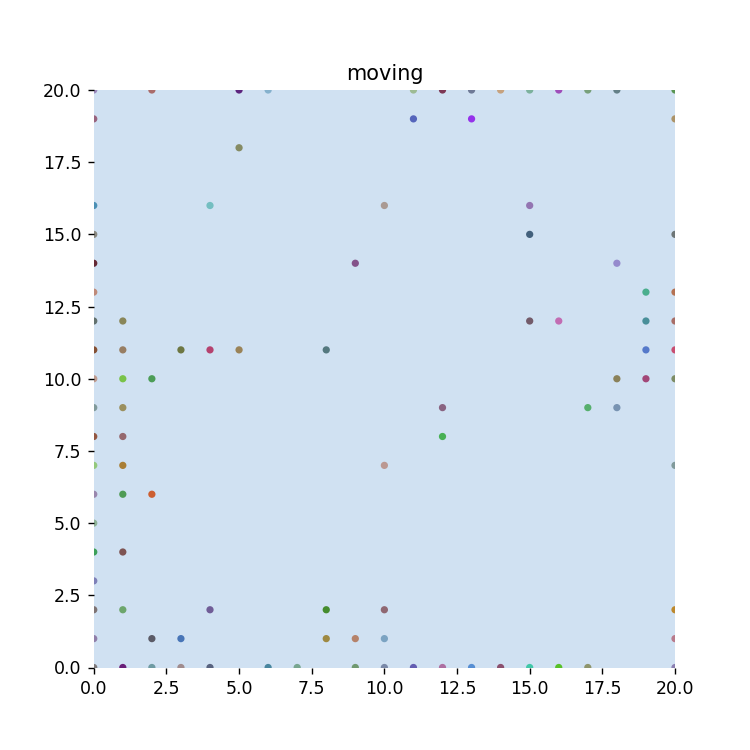

MovieWriter imagemagick unavailable; using Pillow instead.


1


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 36.01it/s]


<IPython.core.display.Javascript object>


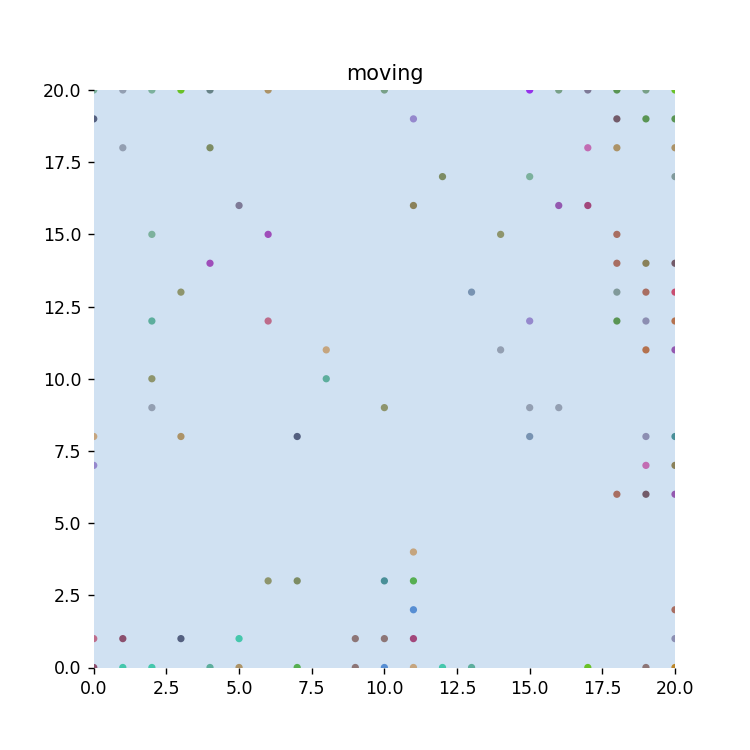

MovieWriter imagemagick unavailable; using Pillow instead.


2


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 28.54it/s]


<IPython.core.display.Javascript object>


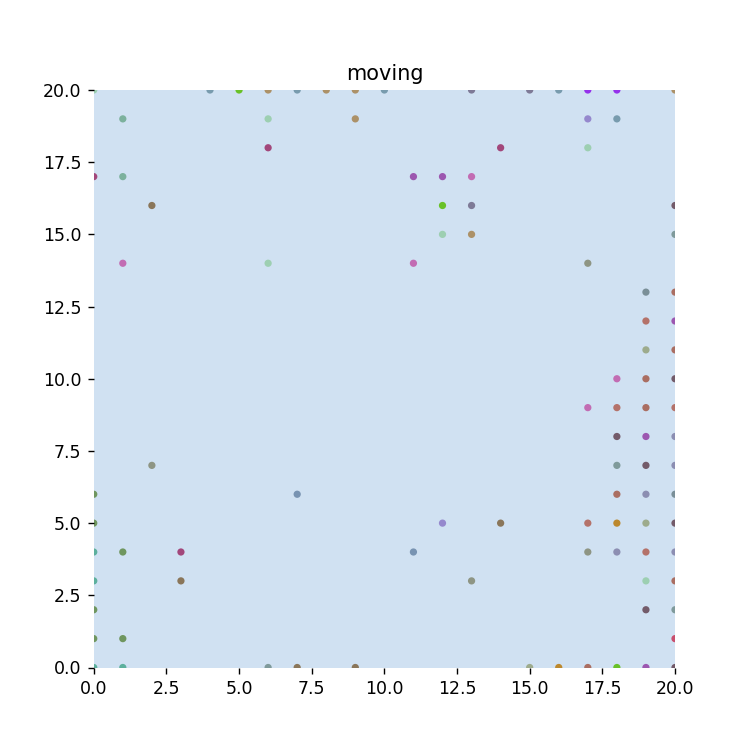

MovieWriter imagemagick unavailable; using Pillow instead.


3


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 36.74it/s]


<IPython.core.display.Javascript object>


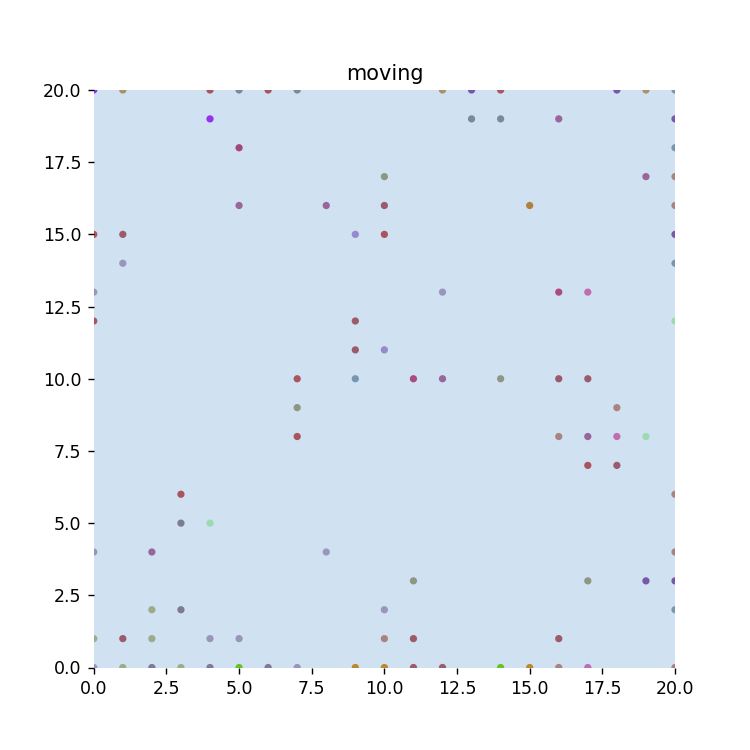

MovieWriter imagemagick unavailable; using Pillow instead.


4


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 28.35it/s]


<IPython.core.display.Javascript object>


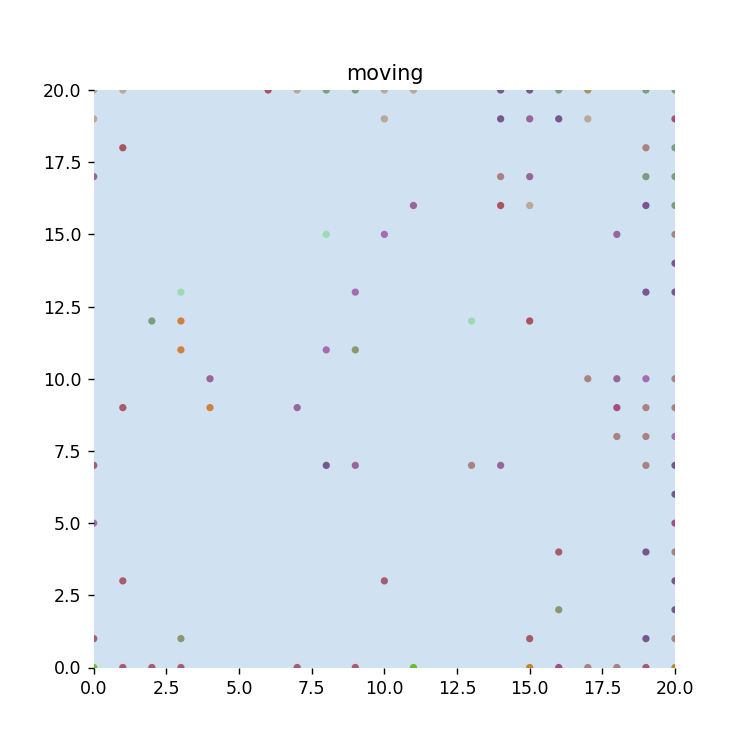

MovieWriter imagemagick unavailable; using Pillow instead.


5


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.96it/s]


<IPython.core.display.Javascript object>


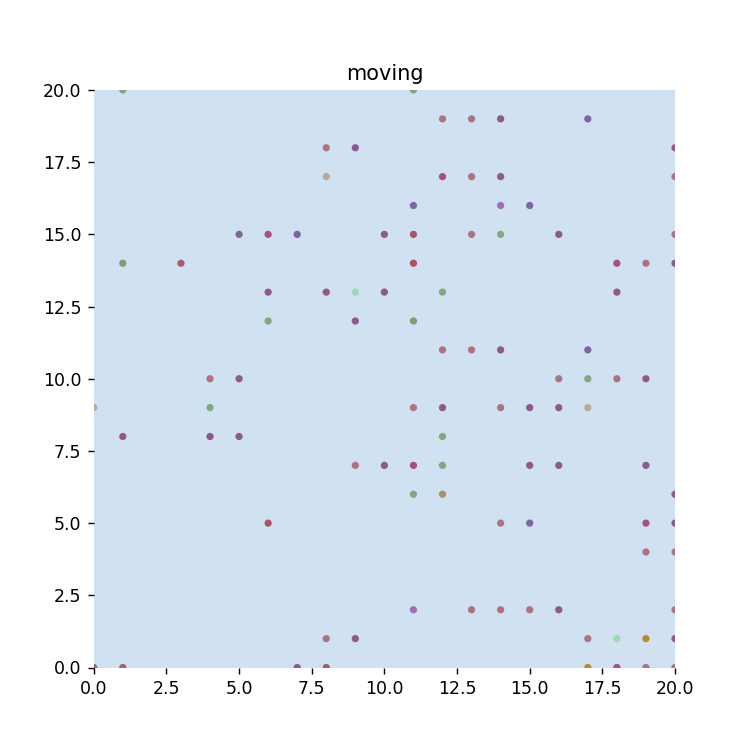

MovieWriter imagemagick unavailable; using Pillow instead.


6


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 39.78it/s]


<IPython.core.display.Javascript object>


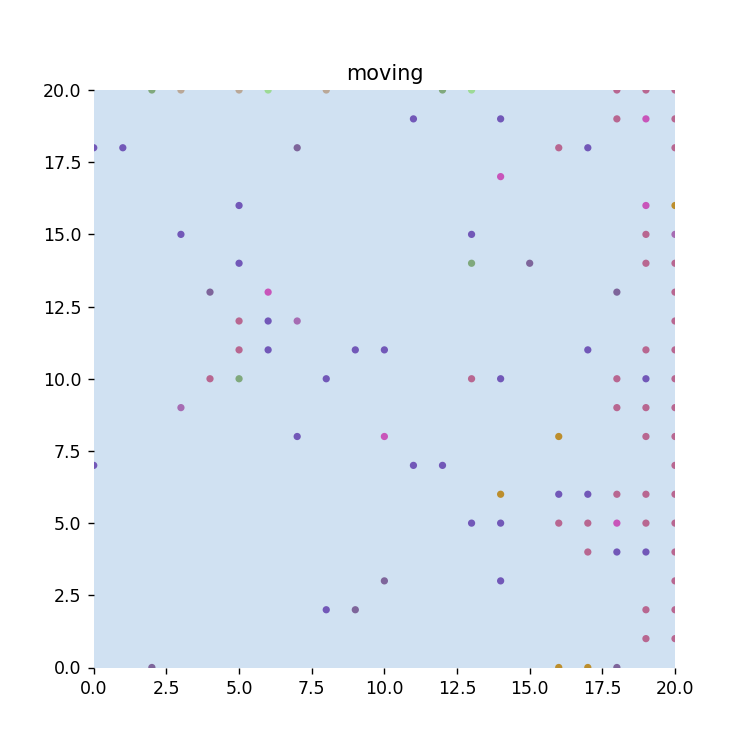

MovieWriter imagemagick unavailable; using Pillow instead.


7


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 59.46it/s]


<IPython.core.display.Javascript object>


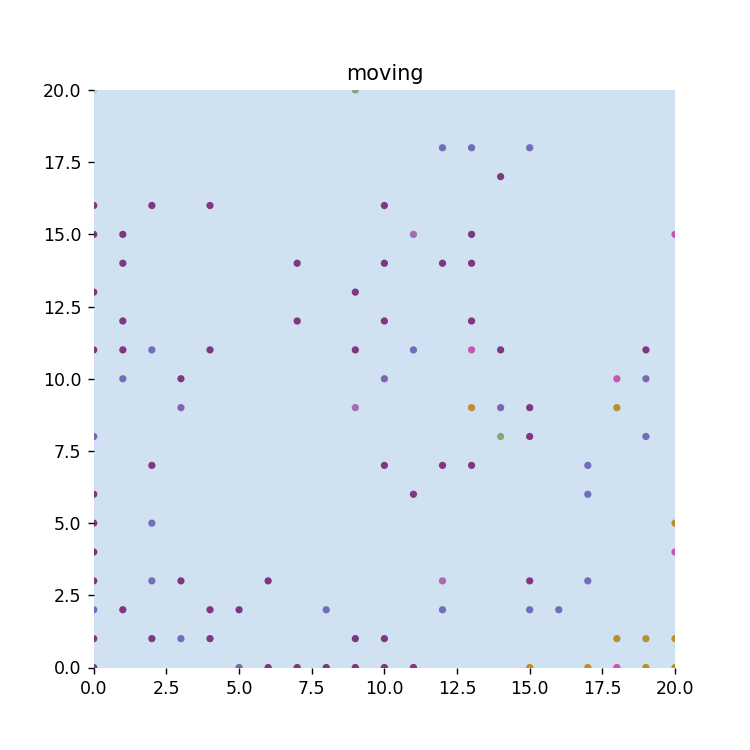

MovieWriter imagemagick unavailable; using Pillow instead.


8


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 54.90it/s]


<IPython.core.display.Javascript object>


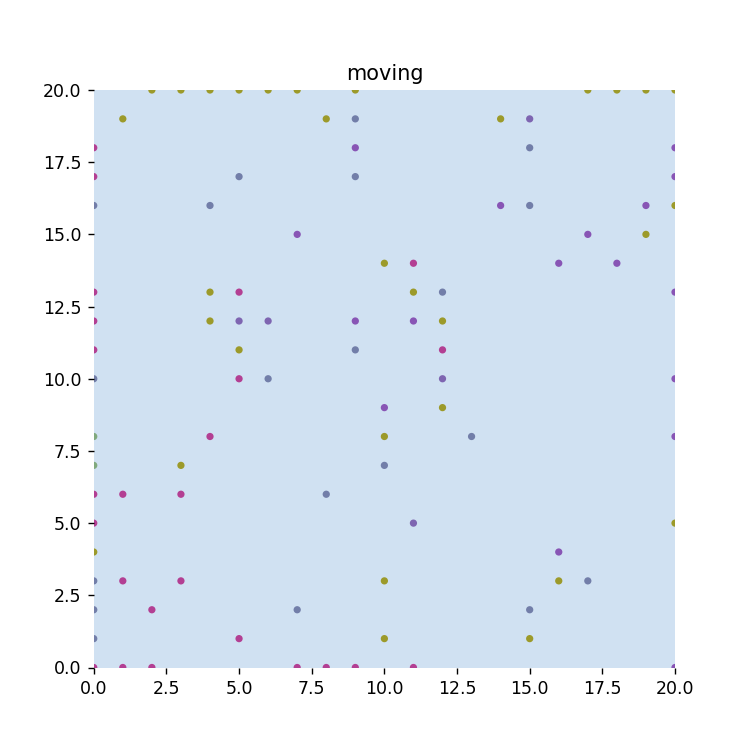

MovieWriter imagemagick unavailable; using Pillow instead.


9


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 49.30it/s]


<IPython.core.display.Javascript object>


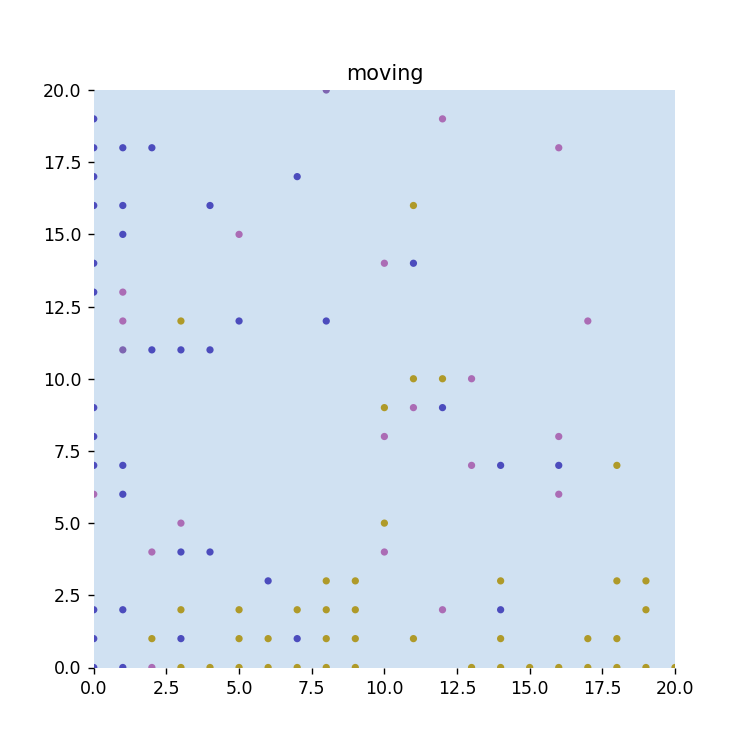

MovieWriter imagemagick unavailable; using Pillow instead.


10


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 18.86it/s]


<IPython.core.display.Javascript object>


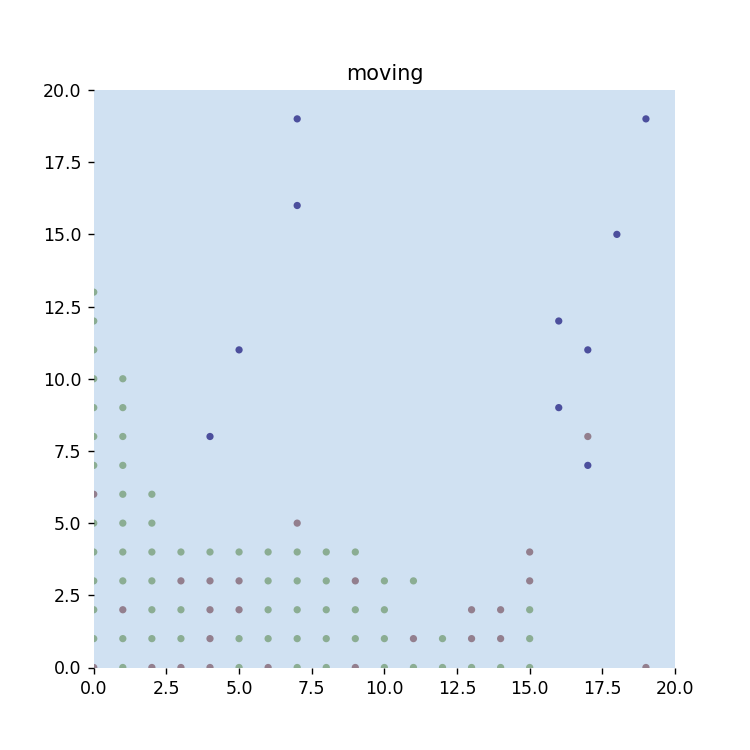

MovieWriter imagemagick unavailable; using Pillow instead.


11


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 28.92it/s]


<IPython.core.display.Javascript object>


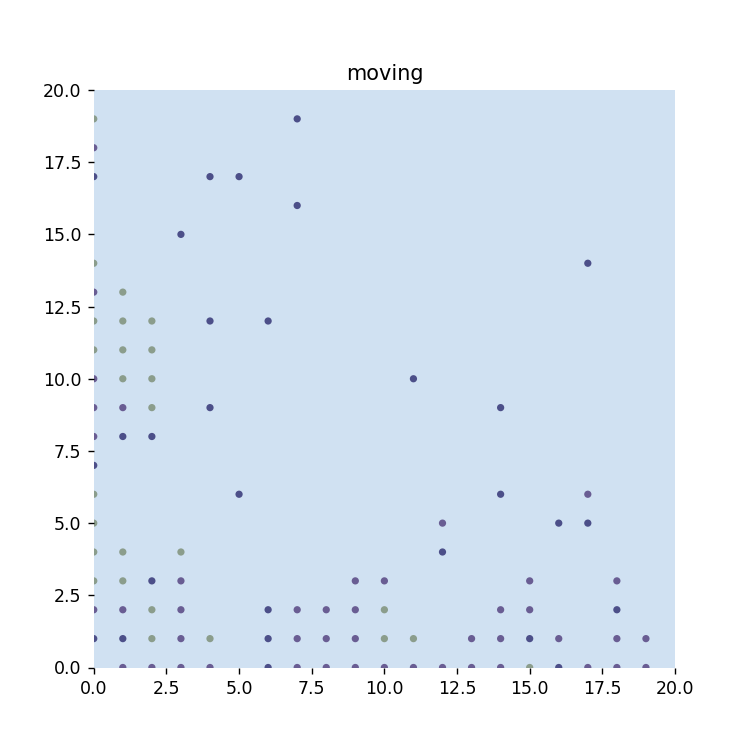

MovieWriter imagemagick unavailable; using Pillow instead.


12


100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 100.41it/s]


<IPython.core.display.Javascript object>


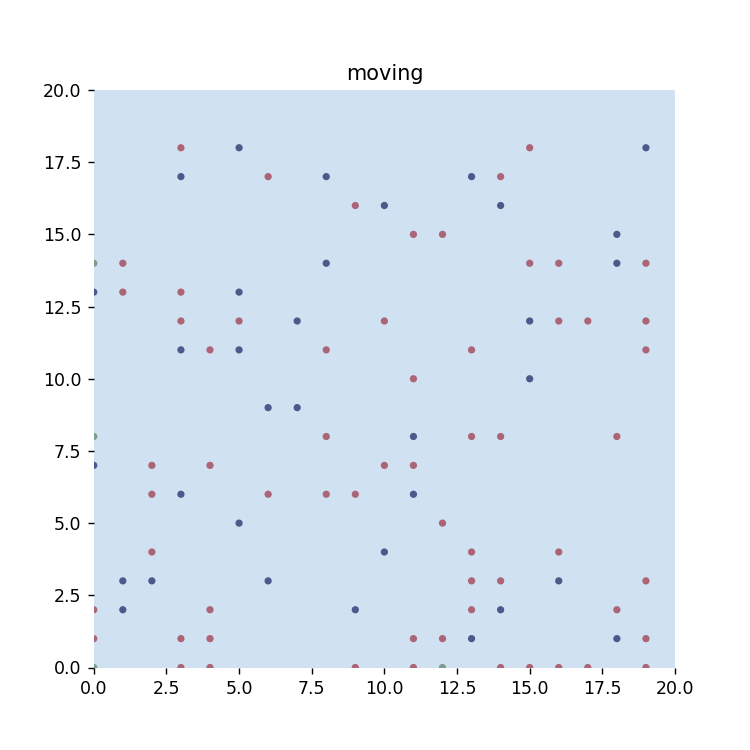

MovieWriter imagemagick unavailable; using Pillow instead.


13


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 41.95it/s]


<IPython.core.display.Javascript object>


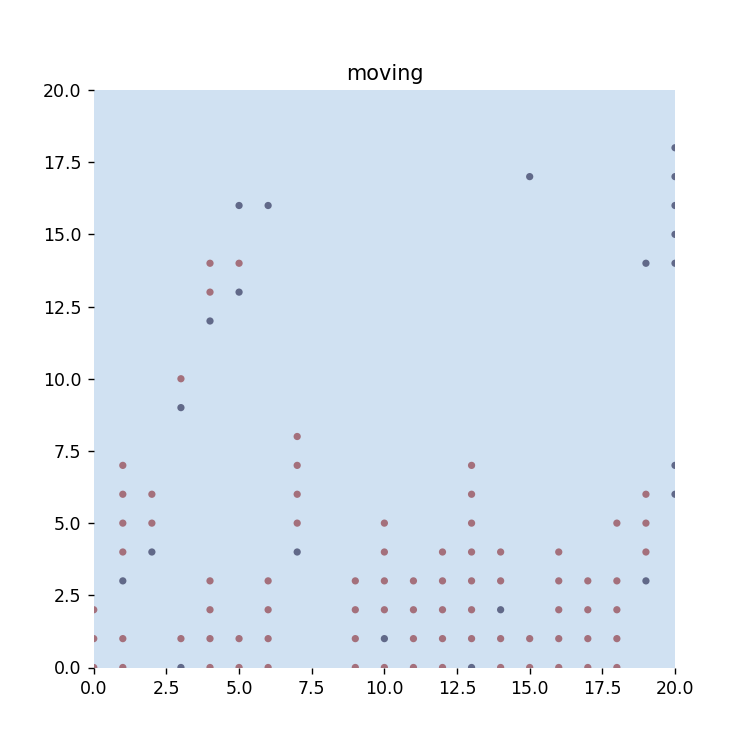

MovieWriter imagemagick unavailable; using Pillow instead.


14


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 20.39it/s]


<IPython.core.display.Javascript object>


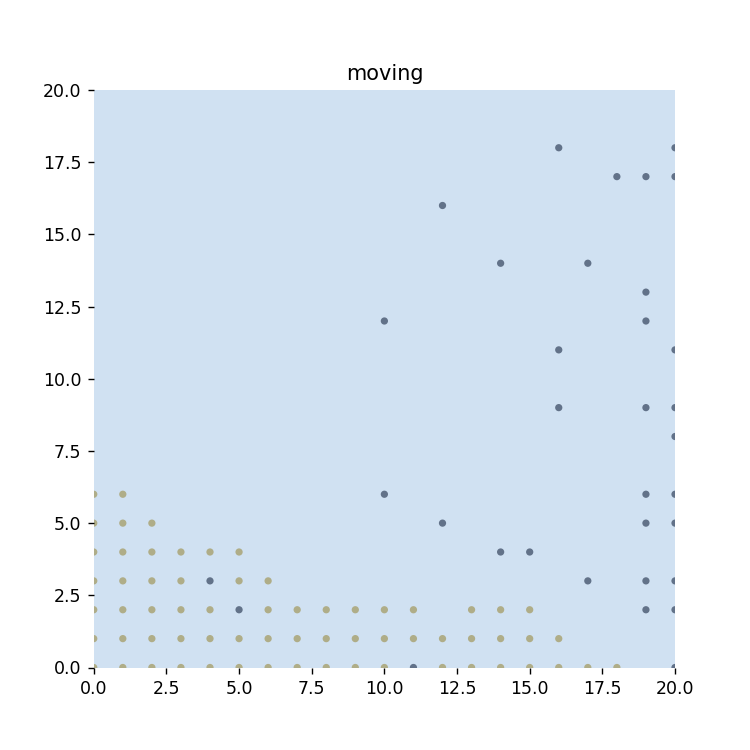

MovieWriter imagemagick unavailable; using Pillow instead.


15


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 38.15it/s]


<IPython.core.display.Javascript object>


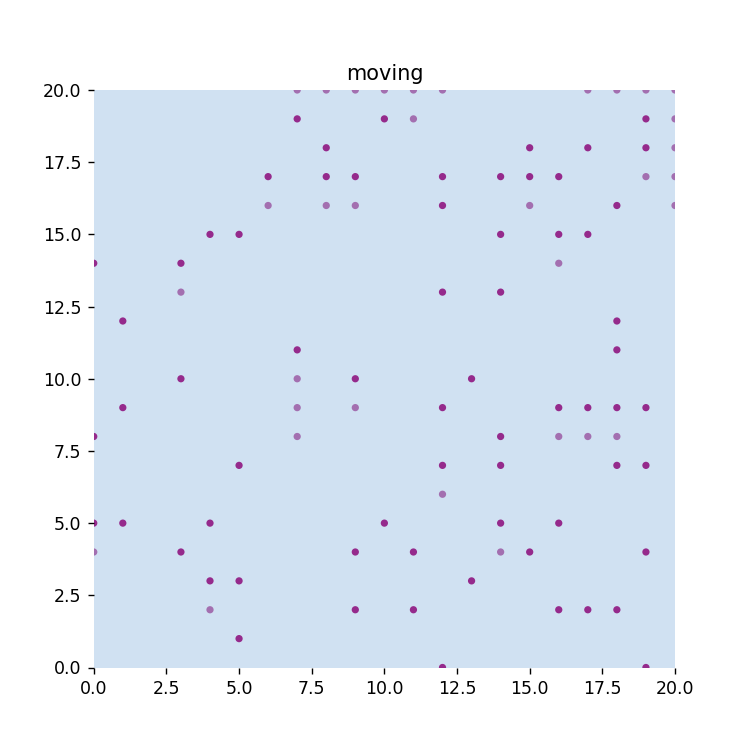

MovieWriter imagemagick unavailable; using Pillow instead.


16


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.04it/s]


<IPython.core.display.Javascript object>


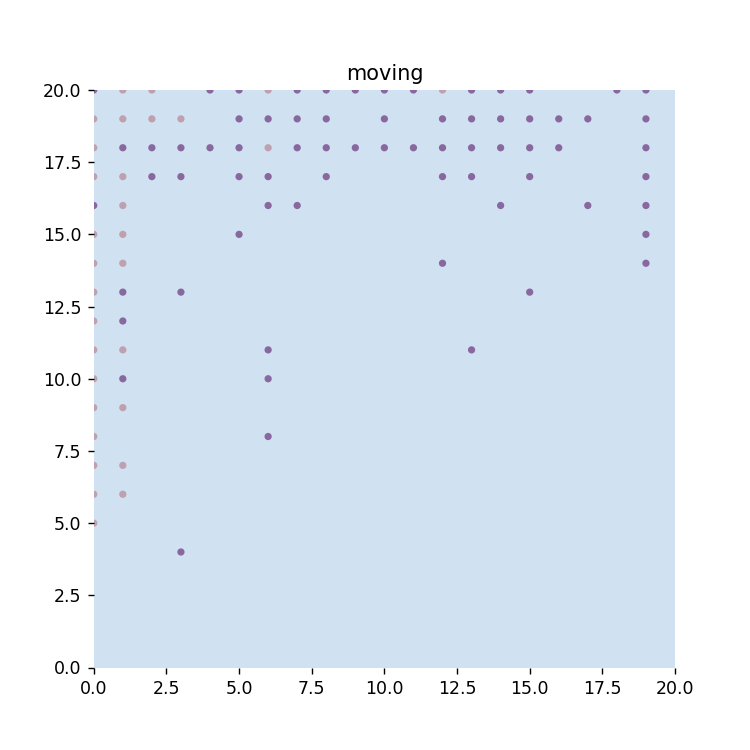

MovieWriter imagemagick unavailable; using Pillow instead.


17


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 24.23it/s]


<IPython.core.display.Javascript object>


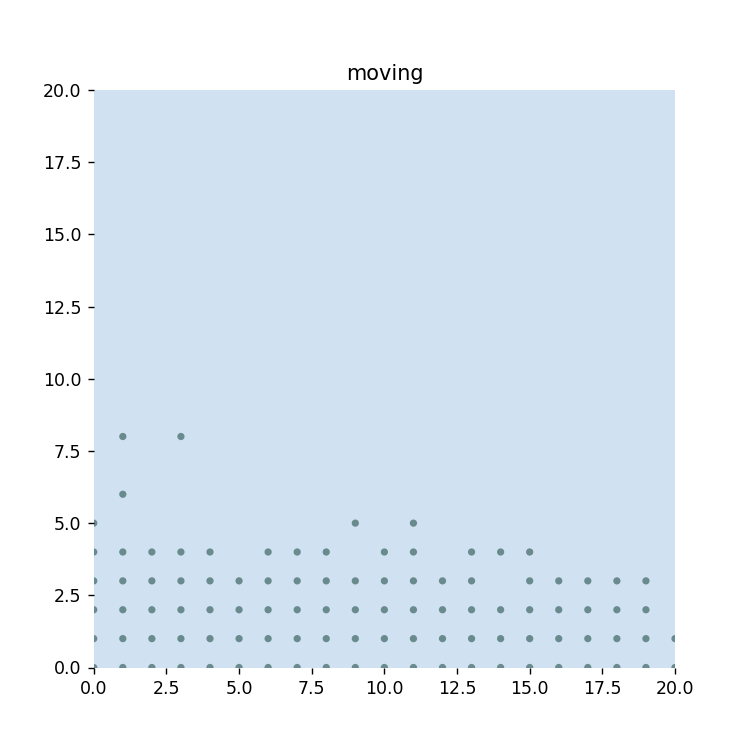

MovieWriter imagemagick unavailable; using Pillow instead.


18


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 14.68it/s]


<IPython.core.display.Javascript object>


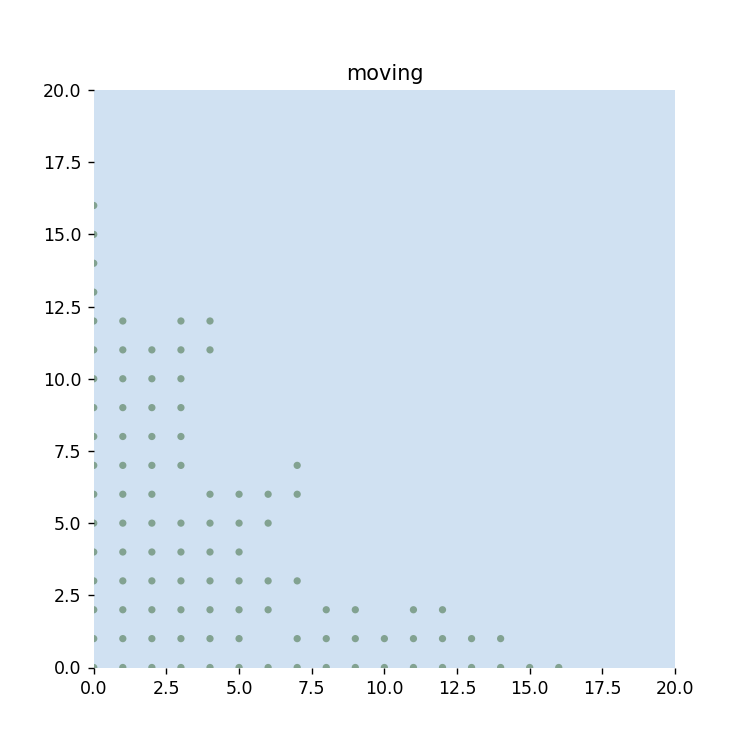

MovieWriter imagemagick unavailable; using Pillow instead.


19


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 37.21it/s]


<IPython.core.display.Javascript object>


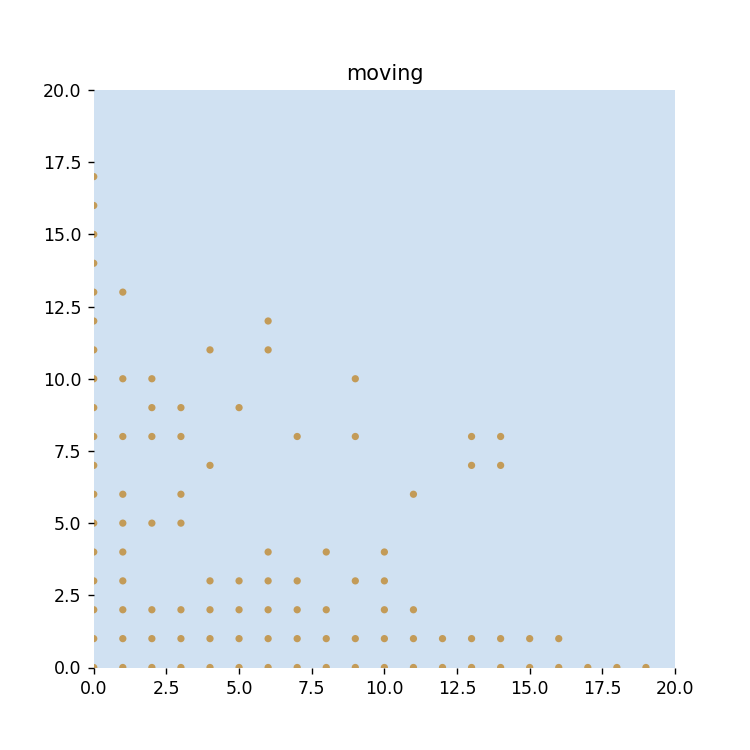

MovieWriter imagemagick unavailable; using Pillow instead.


In [4]:
result = {}
for gen_nr in range(20):
    print(gen_nr)
    if gen_nr == 0:
        result = initial_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner, world_size)
        result = steps_in_generation(world_size*2, result, world_size_x, world_size_y)
#         print(result[0])
    else:
        
        result = asexual_reproduction_and_mutation(world_size, result, nr_individuals)
        
        result = next_generation(result,nr_of_input, nr_of_actions, nr_of_inner, world_size, nr_individuals)
#         print(result[0])
        result = steps_in_generation(world_size*2, result, world_size_x, world_size_y)
        
#     coords = generate_dictionary_of_coords(result, world_size+1)
    
    result.update(result)
    
    dic_color = {}
    for indiv in result:
        rgb_colors = list(map(hex_to_rgb, result[indiv]['genome']))
        color = tuple(pd.DataFrame(rgb_colors).median()) 
        dic_color[indiv] = color
        
    coords = generate_dictionary_of_coords(result, world_size*2, dic_color)
    
    def update(i):
        ax.clear()
        ax.set_facecolor(plt.cm.Blues(.2))

        ax.set_xlim([0,world_size_x])
        ax.set_ylim([0,world_size_y])
        ax.set_title('moving')
        ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c=coords[i]['color'], s=10, marker='o')
#         ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
        [spine.set_visible(False) for spine in ax.spines.values()]


    fig, ax = plt.subplots(figsize=(6,6))
    myAnimation = FuncAnimation(
        fig = fig,
        func = update,
        frames = len(coords),
        interval = 10, repeat=False
    )
    myAnimation.save(f'generation-{gen_nr}.gif', writer='imagemagick' , fps=10)

In [5]:
result

{0: {'out': {'out4': 0.816, 'out2': 0.01, 'out1': 0.977, 'out3': 0.004},
  'brain': {'mid0out4': ['mid0', 'out4', 0.7459179001983824],
   'in0out2': ['in0', 'out2', -2.284755074011903],
   'in0mid0': ['in0', 'mid0', -1.00607355409736],
   'mid2out1': ['mid2', 'out1', 1.8721196398596063],
   'in0mid2': ['in0', 'mid2', 3.884022585075538],
   'in0out3': ['in0', 'out3', -2.7462231039218676],
   'mid0mid1': ['mid0', 'mid1', -2.5281855638638793],
   'mid0out3': ['mid0', 'out3', -2.780894246909812]},
  'in': ['in0'],
  'genome': ['ced997de',
   '64eb491b',
   '3a2a2031',
   'b881bbe7',
   'e44fc47',
   '44b557df',
   'ec6a50e5',
   'efce58fb'],
  'position': [[5, 13],
   [5, 13],
   [5, 12],
   [5, 12],
   [5, 12],
   [5, 12],
   [5, 12],
   [5, 12],
   [5, 12],
   [5, 12],
   [5, 11],
   [5, 11],
   [5, 11],
   [5, 11],
   [5, 11],
   [5, 11],
   [5, 11],
   [4, 11],
   [3, 11],
   [3, 11],
   [3, 11],
   [2, 11],
   [2, 11],
   [1, 10],
   [1, 10],
   [1, 10],
   [1, 10],
   [1, 10],
   [1,